In [1]:
%matplotlib inline

In [2]:
import mcaa
import random as rng
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams["figure.figsize"] = (16, 5)

In [4]:
# Constants
BETA = 1.5
ALPHA = 5.5 
N = 1000
M = int(ALPHA * N) 
T = 2 * N
MEASURE_STEP = 1
RUN_COUNT = 5
THREAD_COUNT = 4

In [5]:
# SEEDS
weightsSeed = rng.randint(0,2**32-1)
patternsSeed = rng.randint(0,2**32-1)

samplerSeeds = [rng.randint(0,2**32-1) for i in range(RUN_COUNT)]
runnerSeeds = [rng.randint(0,2**32-1) for i in range(RUN_COUNT)]

In [6]:
# Input variables
weights = mcaa.buildRandomWeights(N, weightsSeed)
patterns = mcaa.buildRandomPatterns(N, M, patternsSeed)
classes = mcaa.buildClasses(weights, patterns)

In [7]:
# SAMPLERS & RUNNERS
samplers = [mcaa.sampler(N, samplerSeeds[i]) for i in range(RUN_COUNT)]
runners = [mcaa.MCMCRunner(T, MEASURE_STEP, BETA, samplers[i], weights, patterns, classes, runnerSeeds[i]) \
           for i in range(RUN_COUNT)]
multiRunner = mcaa.multiMCMCRunner(THREAD_COUNT, [runner.getPointer() for runner in runners]) 

In [9]:
# RUN
multiRunner.runAll()

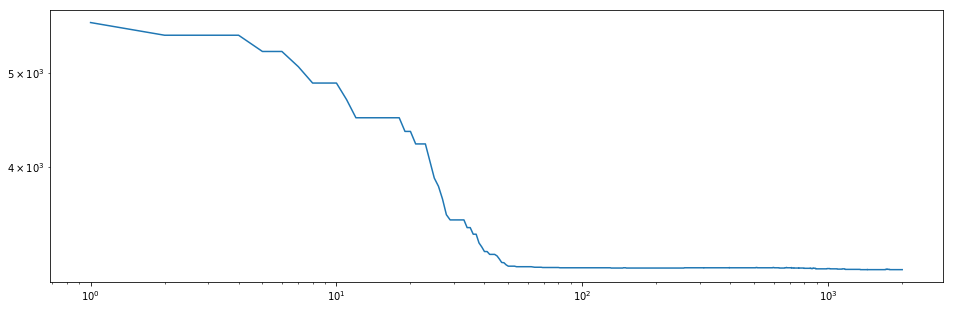

In [7]:
plt.plot(runner.getEMeasures())
plt.xscale('log')
plt.yscale('log')

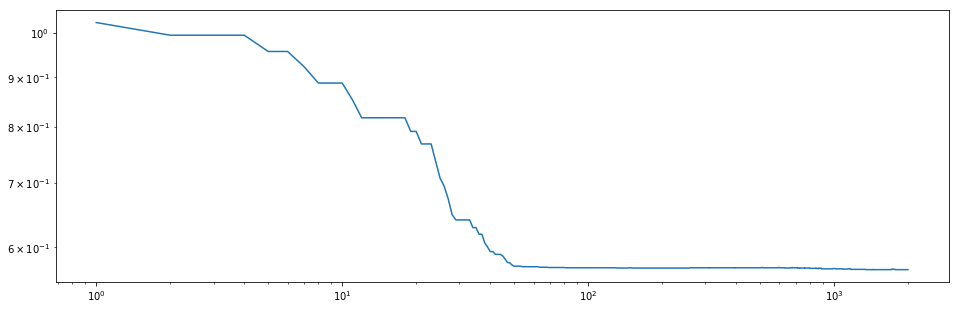

In [8]:
plt.plot(runner.getEMeasures() / M)
plt.xscale('log')
plt.yscale('log')

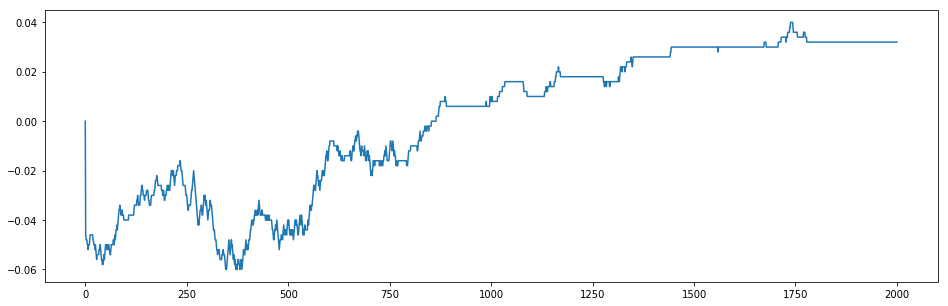

In [9]:
plt.plot(runner.getOverlapMeasures())

In [10]:
finalWeights = sampler.getSamples()

In [11]:
count = 0
for i in range(N):
    if (weights[i] != finalWeights[i]):
        count = count + 1

In [12]:
count

484